In [7]:
import sys
sys.path.append('..')

In [8]:
import uproot

import numpy as np
import pandas as pd
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.measure import label, regionprops
from scipy.ndimage import label as scipy_label
from collections import deque

from lariat import Event

In [9]:
deuterons = pd.read_csv('/Users/user/data/research/proton-deuteron/csv/deuteron_candidates_bbox_t100.csv') # from within vertices bounding box
protons = pd.read_csv('/Users/user/data/research/proton-deuteron/csv/protons_one_track_filepaths.csv') # with only one track from reco

In [10]:
def extract_all_clusters_to_df(events_df, particle_type, threshold=15, max_events=None):
    """Extract all clusters from events and create a dataframe"""
    
    cluster_data = []
    
    # Limit events if specified
    if max_events:
        events_df = events_df.head(max_events)
    
    for i, row in events_df.iterrows():
        try:
            # Create event
            event = Event(row.file_path, index=row.event_index)
            
            # Get connected regions with specified threshold
            clabeled, cregions = event.connectedregions(event.collection, threshold=threshold)
            ilabeled, iregions = event.connectedregions(event.induction, threshold=threshold)
            
            # Process collection plane clusters
            if cregions is not None:
                for j, region in enumerate(cregions):
                    # Get the matrix and column maxes
                    matrix = region.image_intensity
                    matrix_transformed = matrix.T[::-1]
                    column_maxes = np.max(matrix_transformed, axis=0)
                    
                    cluster_info = {
                        'event_idx': i,
                        'run': row.run,
                        'subrun': row.subrun,
                        'event': row.event,
                        'file_path': row.file_path,
                        'event_index': row.event_index,
                        'particle_type': particle_type,
                        'plane': 'collection',
                        'cluster_idx': j,
                        'area': region.area,
                        'max_intensity': region.intensity_max,
                        'min_intensity': region.intensity_min,
                        'mean_intensity': region.intensity_mean,
                        'total_intensity': region.intensity_image.sum(),
                        'centroid_x': region.centroid[0],
                        'centroid_y': region.centroid[1],
                        'bbox_min_row': region.bbox[0],
                        'bbox_min_col': region.bbox[1],
                        'bbox_max_row': region.bbox[2],
                        'bbox_max_col': region.bbox[3],
                        'width': region.bbox[3] - region.bbox[1],
                        'height': region.bbox[2] - region.bbox[0],
                        'aspect_ratio': (region.bbox[3] - region.bbox[1]) / (region.bbox[2] - region.bbox[0]),
                        'compactness': region.area / ((region.bbox[3] - region.bbox[1]) * (region.bbox[2] - region.bbox[0])),
                        'image_intensity': region.image_intensity,  # Original image
                        'matrix_transformed': matrix_transformed,   # Transposed and flipped matrix
                        'column_maxes': column_maxes               # Column maxes array
                    }
                    cluster_data.append(cluster_info)
            
            # Process induction plane clusters
            if iregions is not None:
                for j, region in enumerate(iregions):
                    # Get the matrix and column maxes
                    matrix = region.image_intensity
                    matrix_transformed = matrix.T[::-1]
                    column_maxes = np.max(matrix_transformed, axis=0)
                    
                    cluster_info = {
                        'event_idx': i,
                        'run': row.run,
                        'subrun': row.subrun,
                        'event': row.event,
                        'file_path': row.file_path,
                        'event_index': row.event_index,
                        'particle_type': particle_type,
                        'plane': 'induction',
                        'cluster_idx': j,
                        'area': region.area,
                        'max_intensity': region.intensity_max,
                        'min_intensity': region.intensity_min,
                        'mean_intensity': region.intensity_mean,
                        'total_intensity': region.intensity_image.sum(),
                        'centroid_x': region.centroid[0],
                        'centroid_y': region.centroid[1],
                        'bbox_min_row': region.bbox[0],
                        'bbox_min_col': region.bbox[1],
                        'bbox_max_row': region.bbox[2],
                        'bbox_max_col': region.bbox[3],
                        'width': region.bbox[3] - region.bbox[1],
                        'height': region.bbox[2] - region.bbox[0],
                        'aspect_ratio': (region.bbox[3] - region.bbox[1]) / (region.bbox[2] - region.bbox[0]),
                        'compactness': region.area / ((region.bbox[3] - region.bbox[1]) * (region.bbox[2] - region.bbox[0])),
                        'image_intensity': region.image_intensity,  # Original image
                        'matrix_transformed': matrix_transformed,   # Transposed and flipped matrix
                        'column_maxes': column_maxes               # Column maxes array
                    }
                    cluster_data.append(cluster_info)
                    
        except Exception as e:
            print(f"Error processing event {i}: {e}")
            continue
    
    return pd.DataFrame(cluster_data)

In [16]:
# Extract clusters from deuterons and protons
print("Extracting deuteron clusters...")
deuteron_clusters_df = extract_all_clusters_to_df(deuterons, 'deuteron', threshold=15)

Extracting deuteron clusters...
Found 31 connected regions
Found 2 connected regions
Found 9 connected regions
Found 2 connected regions
Found 85 connected regions
Found 36 connected regions
Found 73 connected regions
Found 30 connected regions
Found 70 connected regions
Found 47 connected regions
Found 67 connected regions
Found 28 connected regions
Found 12 connected regions
Found 15 connected regions
Found 8 connected regions
Found 3 connected regions
Found 21 connected regions
Found 14 connected regions
Found 10 connected regions
Found 8 connected regions
Found 51 connected regions
Found 25 connected regions
Found 29 connected regions
Found 22 connected regions
Found 18 connected regions
Found 10 connected regions
Found 13 connected regions
Found 9 connected regions
Found 7 connected regions
Found 9 connected regions
Found 4 connected regions
Found 4 connected regions
Found 44 connected regions
Found 16 connected regions
Found 23 connected regions
Found 11 connected regions
Found 3

In [17]:
print("Extracting proton clusters...")
proton_clusters_df = extract_all_clusters_to_df(protons, 'proton', threshold=15)

Extracting proton clusters...
Found 5 connected regions
Found 7 connected regions
Found 4 connected regions
Found 4 connected regions
Found 20 connected regions
Found 8 connected regions
Found 9 connected regions
Found 5 connected regions
Found 7 connected regions
Found 5 connected regions
Found 5 connected regions
Found 4 connected regions
Found 5 connected regions
Found 3 connected regions
Found 4 connected regions
Found 2 connected regions
Found 12 connected regions
Found 5 connected regions
Found 5 connected regions
Found 4 connected regions
Found 8 connected regions
Found 6 connected regions
Found 4 connected regions
Found 3 connected regions
Found 1 connected regions
Found 3 connected regions
Found 3 connected regions
Found 1 connected regions
Found 10 connected regions
Found 5 connected regions
Found 5 connected regions
Found 1 connected regions
Found 8 connected regions
Found 6 connected regions
Found 8 connected regions
Found 6 connected regions
Found 34 connected regions
Foun

In [18]:
# Combine into single dataframe
all_clusters_df = pd.concat([deuteron_clusters_df, proton_clusters_df], ignore_index=True)

print(f"\nCluster extraction complete!")
print(f"Deuteron clusters: {len(deuteron_clusters_df)}")
print(f"Proton clusters: {len(proton_clusters_df)}")
print(f"Total clusters: {len(all_clusters_df)}")


Cluster extraction complete!
Deuteron clusters: 354879
Proton clusters: 83696
Total clusters: 438575


In [11]:
all_clusters_df

,event_idx,run,subrun,event,file_path,event_index,particle_type,plane,cluster_idx,area,...,bbox_min_col,bbox_max_row,bbox_max_col,width,height,aspect_ratio,compactness,image_intensity,matrix_transformed,column_maxes
0,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,0,9047.0,...,154,196,944,790,171,4.619883,0.066970,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0...","[30.0, 99.0, 109.0, 78.0, 78.0, 80.0, 85.0, 78..."
1,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,1,22.0,...,888,36,910,22,1,22.000000,1.000000,"[[16.0, 18.0, 20.0, 21.0, 23.0, 24.0, 25.0, 26...","[[17.0], [18.0], [20.0], [21.0], [22.0], [23.0...",[27.0]
2,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,2,29.0,...,484,174,513,29,1,29.000000,1.000000,"[[16.0, 18.0, 19.0, 21.0, 23.0, 25.0, 27.0, 28...","[[16.0], [17.0], [19.0], [20.0], [22.0], [23.0...",[33.0]
3,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,3,24.0,...,369,197,393,24,1,24.000000,1.000000,"[[16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 18...","[[16.0], [16.0], [17.0], [17.0], [17.0], [17.0...",[18.0]
4,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,4,31.0,...,188,198,219,31,1,31.000000,1.000000,"[[17.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32...","[[17.0], [18.0], [20.0], [21.0], [23.0], [24.0...",[37.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438570,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,4,31.0,...,2570,93,2601,31,1,31.000000,1.000000,"[[16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27...","[[16.0], [18.0], [19.0], [20.0], [21.0], [23.0...",[33.0]
438571,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,5,27.0,...,277,115,304,27,1,27.000000,1.000000,"[[16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 29...","[[16.0], [18.0], [20.0], [21.0], [23.0], [24.0...",[33.0]
438572,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,0,1559.0,...,1101,83,1239,138,56,2.464286,0.201734,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[23.0, 43.0, 54.0, 62.0, 51.0, 51.0, 56.0, 59...."
438573,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,1,24.0,...,2707,79,2731,24,1,24.000000,1.000000,"[[17.0, 19.0, 22.0, 25.0, 27.0, 30.0, 33.0, 35...","[[20.0], [25.0], [29.0], [34.0], [37.0], [40.0...",[45.0]


In [19]:
all_clusters_df.to_pickle('/Users/user/data/research/proton-deuteron/csv/all_clusters_df.pkl')

In [20]:
# all_clusters_df.to_csv("/Users/user/data/research/proton-deuteron/csv/allclusters.csv", index=False)

In [11]:
all_clusters_df = pd.read_csv("/Users/user/data/research/proton-deuteron/csv/allclusters.csv")

In [21]:
all_clusters_df

,event_idx,run,subrun,event,file_path,event_index,particle_type,plane,cluster_idx,area,...,bbox_min_col,bbox_max_row,bbox_max_col,width,height,aspect_ratio,compactness,image_intensity,matrix_transformed,column_maxes
0,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,0,9047.0,...,154,196,944,790,171,4.619883,0.066970,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0...","[30.0, 99.0, 109.0, 78.0, 78.0, 80.0, 85.0, 78..."
1,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,1,22.0,...,888,36,910,22,1,22.000000,1.000000,"[[16.0, 18.0, 20.0, 21.0, 23.0, 24.0, 25.0, 26...","[[17.0], [18.0], [20.0], [21.0], [22.0], [23.0...",[27.0]
2,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,2,29.0,...,484,174,513,29,1,29.000000,1.000000,"[[16.0, 18.0, 19.0, 21.0, 23.0, 25.0, 27.0, 28...","[[16.0], [17.0], [19.0], [20.0], [22.0], [23.0...",[33.0]
3,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,3,24.0,...,369,197,393,24,1,24.000000,1.000000,"[[16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 18...","[[16.0], [16.0], [17.0], [17.0], [17.0], [17.0...",[18.0]
4,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,4,31.0,...,188,198,219,31,1,31.000000,1.000000,"[[17.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32...","[[17.0], [18.0], [20.0], [21.0], [23.0], [24.0...",[37.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438570,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,4,31.0,...,2570,93,2601,31,1,31.000000,1.000000,"[[16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27...","[[16.0], [18.0], [19.0], [20.0], [21.0], [23.0...",[33.0]
438571,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,5,27.0,...,277,115,304,27,1,27.000000,1.000000,"[[16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 29...","[[16.0], [18.0], [20.0], [21.0], [23.0], [24.0...",[33.0]
438572,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,0,1559.0,...,1101,83,1239,138,56,2.464286,0.201734,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[23.0, 43.0, 54.0, 62.0, 51.0, 51.0, 56.0, 59...."
438573,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,1,24.0,...,2707,79,2731,24,1,24.000000,1.000000,"[[17.0, 19.0, 22.0, 25.0, 27.0, 30.0, 33.0, 35...","[[20.0], [25.0], [29.0], [34.0], [37.0], [40.0...",[45.0]


In [22]:
def plot_cluster_with_profile_and_event(df, row_index):
    """Plot original event, cluster image and its column maxes profile"""
    
    if row_index >= len(df):
        print(f"Index {row_index} out of range. Max index: {len(df)-1}")
        return
    
    cluster = df.iloc[row_index]
    
    # Get data
    image = cluster['image_intensity']
    column_maxes = cluster['column_maxes']
    
    # Load the original event
    try:
        event = Event(cluster['file_path'], index=cluster['event_index'])
        collection_data = event.collection
        induction_data = event.induction
    except Exception as e:
        print(f"Could not load original event: {e}")
        return
    
    # Create subplots - 2 rows, 2 columns
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
    
    # Plot 1: Original Collection Plane with bounding box
    im1 = ax1.imshow(collection_data.T, cmap='viridis', aspect='auto', origin='lower')
    ax1.set_xlabel('Wire Number')
    ax1.set_ylabel('Time Tick')
    ax1.set_title(f'Original Event - Collection Plane\n{cluster["particle_type"].title()}')
    
    # Add bounding box if this cluster is from collection plane
    if cluster['plane'] == 'collection':
        bbox = [cluster['bbox_min_col'], cluster['bbox_min_row'], 
                cluster['bbox_max_col'], cluster['bbox_max_row']]
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], 
                            linewidth=2, edgecolor='red', facecolor='none')
        ax1.add_patch(rect)
        ax1.set_title(f'Original Event - Collection Plane (Cluster Highlighted)\n{cluster["particle_type"].title()}')
    
    plt.colorbar(im1, ax=ax1, label='ADC Counts')
    
    # Plot 2: Original Induction Plane with bounding box
    im2 = ax2.imshow(induction_data.T, cmap='viridis', aspect='auto', origin='lower')
    ax2.set_xlabel('Wire Number')
    ax2.set_ylabel('Time Tick')
    ax2.set_title(f'Original Event - Induction Plane\n{cluster["particle_type"].title()}')
    
    # Add bounding box if this cluster is from induction plane
    if cluster['plane'] == 'induction':
        bbox = [cluster['bbox_min_col'], cluster['bbox_min_row'], 
                cluster['bbox_max_col'], cluster['bbox_max_row']]
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], 
                            linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        ax2.set_title(f'Original Event - Induction Plane (Cluster Highlighted)\n{cluster["particle_type"].title()}')
    
    plt.colorbar(im2, ax=ax2, label='ADC Counts')
    
    # Plot 3: Cluster image (heatmap)
    im3 = ax3.imshow(image.T, cmap='viridis', aspect='auto', origin='lower')
    ax3.set_xlabel('Wire Number')
    ax3.set_ylabel('Time Tick')
    ax3.set_title(f'Extracted Cluster\n{cluster["plane"].title()} Plane')
    plt.colorbar(im3, ax=ax3, label='ADC Counts')
    
    # Plot 4: Column maxes profile
    ax4.plot(column_maxes, 'b-', linewidth=2)
    ax4.set_xlabel('Wire Number')
    ax4.set_ylabel('Max ADC')
    ax4.set_title(f'Wire Profile (Column Maxes)')
    ax4.grid(True, alpha=0.3)
    
    # Add overall title with cluster info
    fig.suptitle(f'Cluster {row_index}: Area={cluster["area"]}, Max Intensity={cluster["max_intensity"]:.1f}\n'
                f'Event: {cluster["run"]}-{cluster["subrun"]}-{cluster["event"]}, '
                f'Dimensions: {cluster["width"]}×{cluster["height"]}',
                fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    # Print additional info
    print(f"Cluster Statistics:")
    print(f"  Area: {cluster['area']} pixels")
    print(f"  Total intensity: {cluster['total_intensity']:.1f}")
    print(f"  Mean intensity: {cluster['mean_intensity']:.1f}")
    print(f"  Aspect ratio: {cluster['aspect_ratio']:.2f}")
    print(f"  Compactness: {cluster['compactness']:.3f}")
    print(f"  Plane: {cluster['plane']}")

Found 49 connected regions
Found 32 connected regions


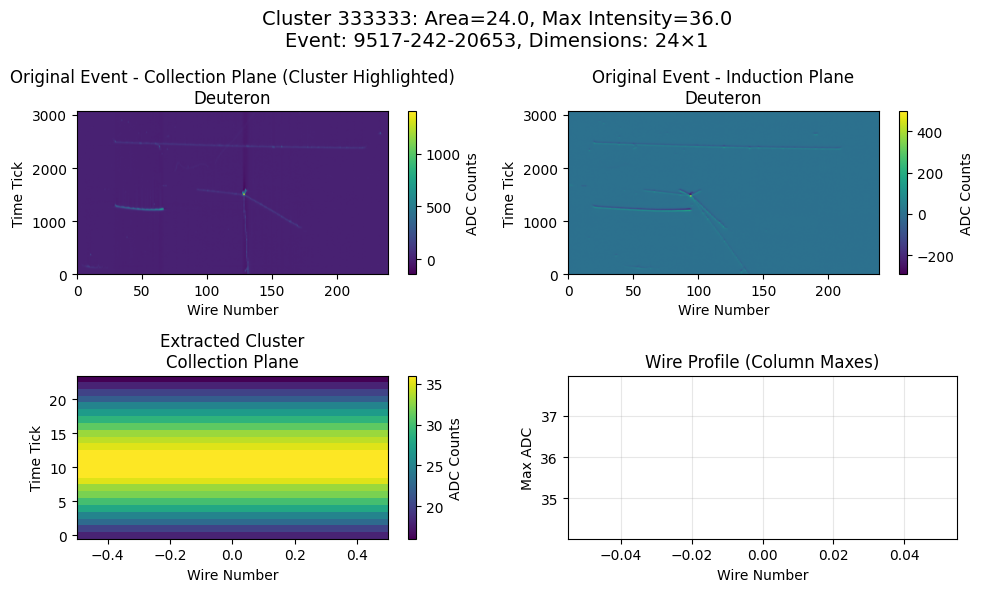

Cluster Statistics:
  Area: 24.0 pixels
  Total intensity: 678.0
  Mean intensity: 28.2
  Aspect ratio: 24.00
  Compactness: 1.000
  Plane: collection


In [23]:
# Usage examples:
plot_cluster_with_profile_and_event(all_clusters_df, 333333)   # First cluster

should remove < 400 pixels

In [24]:
above400 = all_clusters_df[all_clusters_df['area'] > 400]

In [25]:
above400

,event_idx,run,subrun,event,file_path,event_index,particle_type,plane,cluster_idx,area,...,bbox_min_col,bbox_max_row,bbox_max_col,width,height,aspect_ratio,compactness,image_intensity,matrix_transformed,column_maxes
0,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,0,9047.0,...,154,196,944,790,171,4.619883,0.066970,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0...","[30.0, 99.0, 109.0, 78.0, 78.0, 80.0, 85.0, 78..."
9,0,8667,148,10828,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,induction,0,4030.0,...,156,169,873,717,148,4.844595,0.037977,"[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[17.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[20.0, 78.0, 66.0, 55.0, 47.0, 43.0, 47.0, 48...."
11,1,8682,479,43081,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,0,2346.0,...,553,47,699,146,47,3.106383,0.341883,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 16.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0...","[60.0, 91.0, 85.0, 87.0, 98.0, 94.0, 106.0, 88..."
12,1,8682,479,43081,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,1,11874.0,...,221,215,499,278,194,1.432990,0.220166,"[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[36.0, 78.0, 68.0, 66.0, 69.0, 62.0, 74.0, 79...."
13,1,8682,479,43081,/Users/user/data/research/proton-deuteron/rawd...,0,deuteron,collection,2,10122.0,...,1561,220,1825,264,193,1.367876,0.198658,"[[-0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0...","[[-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0....","[43.0, 53.0, 77.0, 133.0, 66.0, 70.0, 72.0, 71..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,7633,9788,305,26707,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,0,534.0,...,870,33,962,92,20,4.600000,0.290217,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[19.0, 60.0, 70.0, 51.0, 52.0, 54.0, 52.0, 52...."
438558,7634,9788,308,26943,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,0,2692.0,...,906,71,1052,146,45,3.244444,0.409741,"[[-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[17.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0...","[55.0, 81.0, 87.0, 144.0, 131.0, 120.0, 122.0,..."
438564,7634,9788,308,26943,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,0,1359.0,...,891,66,997,106,47,2.255319,0.272782,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[17.0, 50.0, 67.0, 77.0, 68.0, 65.0, 67.0, 73...."
438567,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,1,3298.0,...,1117,77,1284,167,58,2.879310,0.340491,"[[-0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0,...","[[17.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0...","[32.0, 50.0, 79.0, 76.0, 90.0, 89.0, 98.0, 87...."


count    68406.000000
mean        87.661667
std         66.605161
min          1.000000
25%         30.000000
50%         65.000000
75%        145.000000
max        240.000000
Name: column_maxes, dtype: float64


Text(0, 0.5, 'count')

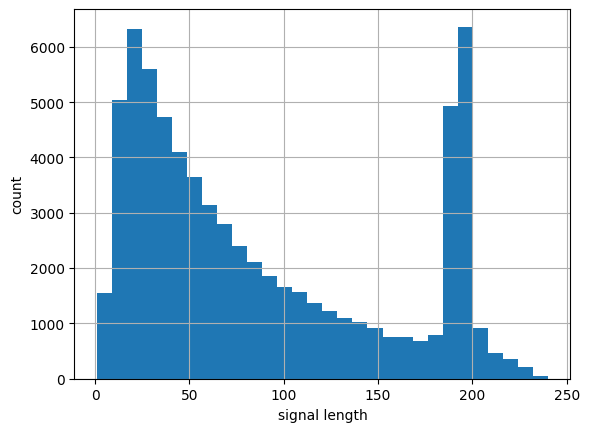

In [26]:
lengths = above400['column_maxes'].map(len)
print(lengths.describe())      # count / mean / std / min / 25% / 50% / 75% / max

ax = lengths.hist(bins=30); ax.set_xlabel('signal length'); ax.set_ylabel('count')


In [27]:
stats = above400['column_maxes'].apply(
    lambda x: pd.Series({'min': np.min(x),
                         'max': np.max(x),
                         'mean': np.mean(x),
                         'std': np.std(x)}))
print(stats.describe())        # distribution of those four stats across the dataset


                min           max          mean           std
count  68406.000000  68406.000000  68406.000000  68406.000000
mean      30.219060    271.795617    113.944219     44.566740
std       17.359446    197.709810     73.345429     39.340838
min       16.000000     25.000000     19.280702      0.000000
25%       19.000000    129.000000     55.601321     18.480601
50%       25.000000    230.000000     93.868139     35.374855
75%       35.000000    357.000000    146.274877     58.104304
max     1206.000000   2354.000000   1206.000000   1011.571934


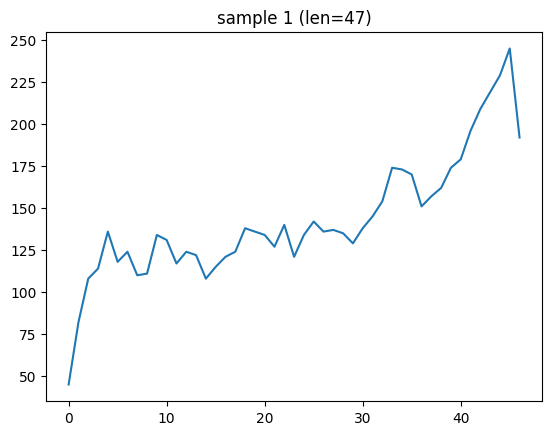

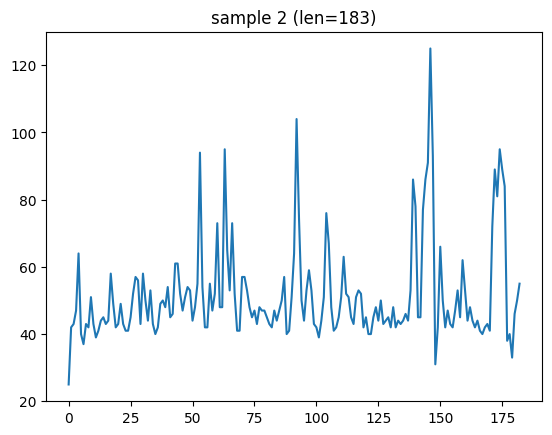

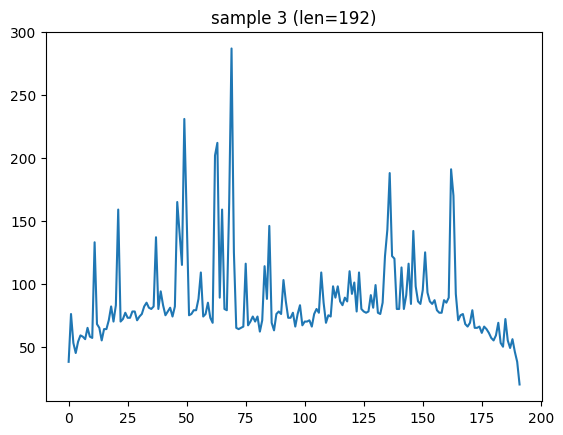

In [28]:
sample = above400['column_maxes'].sample(3, random_state=1313224)

for i, sig in enumerate(sample, start=1):
    plt.figure(); plt.plot(sig); plt.title(f'sample {i} (len={len(sig)})')


In [29]:
mask = above400['column_maxes'].map(len) <= 240
df   = above400[mask].reset_index(drop=True)
print(f'{len(df)} rows kept')

68406 rows kept


In [30]:
import numpy as np
from scipy.signal import savgol_filter

def extract_features(series, win=11):
    # Sanity check
    series = np.asarray(series).astype(float)
    if len(series) == 0 or np.all(series == 0):
        return np.array([0.0, 0.0, 0.0])  # no info

    # Smoothing
    if len(series) < win:
        trend = series
    else:
        safe_win = min(win, len(series) - 1 if len(series) % 2 == 0 else len(series))
        trend = savgol_filter(series, window_length=safe_win, polyorder=2)

    # Slope estimation – with nan guard
    x = np.arange(len(trend))
    if np.any(np.isnan(trend)) or np.any(np.isinf(trend)):
        slope = 0.0
    else:
        try:
            slope = np.polyfit(x, trend, 1)[0]
        except np.linalg.LinAlgError:
            slope = 0.0

    # Volatility
    residuals = series - trend
    if np.any(np.isnan(residuals)) or np.any(np.isinf(residuals)):
        volatility = 0.0
    else:
        volatility = np.std(residuals)

    # Length
    length = len(series)

    return np.array([slope, volatility, length])

In [31]:
 # Add feature matrix columns to df
features = np.array([extract_features(sig) for sig in df['column_maxes']])
df['slope'] = features[:, 0]
df['volatility'] = features[:, 1] 
df['length'] = features[:, 2]

/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/numpy/lib/_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value


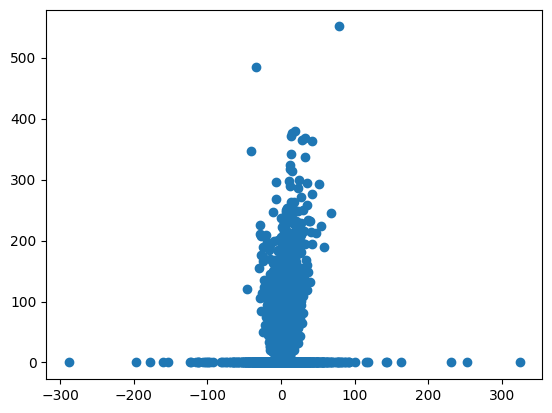

In [32]:
plt.scatter(df['slope'], df['volatility'])

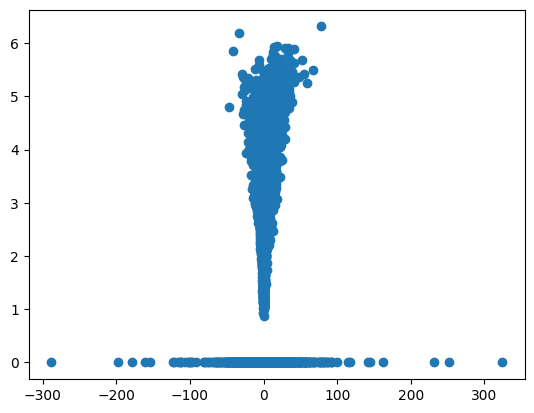

In [33]:
plt.scatter(df['slope'], np.log1p(df['volatility']))  # log(1 + volatility)

In [64]:
features

array([[1.57899061e-01, 3.48165550e+01, 1.71000000e+02],
       [1.48368160e-01, 1.85266163e+01, 1.48000000e+02],
       [1.59019750e-01, 1.14391326e+01, 4.70000000e+01],
       ...,
       [1.67773812e+00, 7.77965244e+00, 4.70000000e+01],
       [2.20213079e+00, 2.04411387e+01, 5.80000000e+01],
       [1.21653012e+00, 7.05976664e+00, 5.60000000e+01]], shape=(68406, 3))

In [35]:
volatilities = df['volatility'].values
volatilities = np.log1p(volatilities)
slopes = df['slope'].values

In [36]:
from sklearn.preprocessing import StandardScaler

X = np.column_stack((slopes, volatilities))
X_scaled = StandardScaler().fit_transform(X)

In [43]:
from sklearn.cluster import KMeans

labels = KMeans(n_clusters=2, random_state=12).fit_predict(X_scaled)

/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-pac

In [51]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=3)
labels = gmm.fit_predict(X_scaled)

/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-pac

In [58]:
import pickle
with open('gmm_model.pkl', 'wb') as f:
    pickle.dump(gmm, f)

In [ ]:
with open('gmm_model.pkl', 'rb') as f:
    gmm = pickle.load(f)

Text(0.5, 1.0, 'K-means clustering: slope vs volatility')

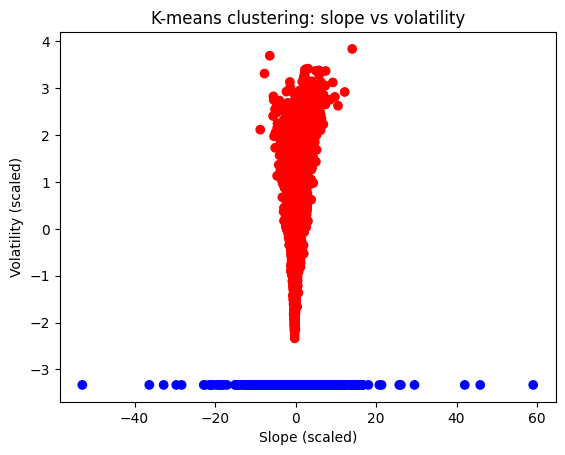

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='bwr')
plt.xlabel("Slope (scaled)")
plt.ylabel("Volatility (scaled)")
plt.title("K-means clustering: slope vs volatility")

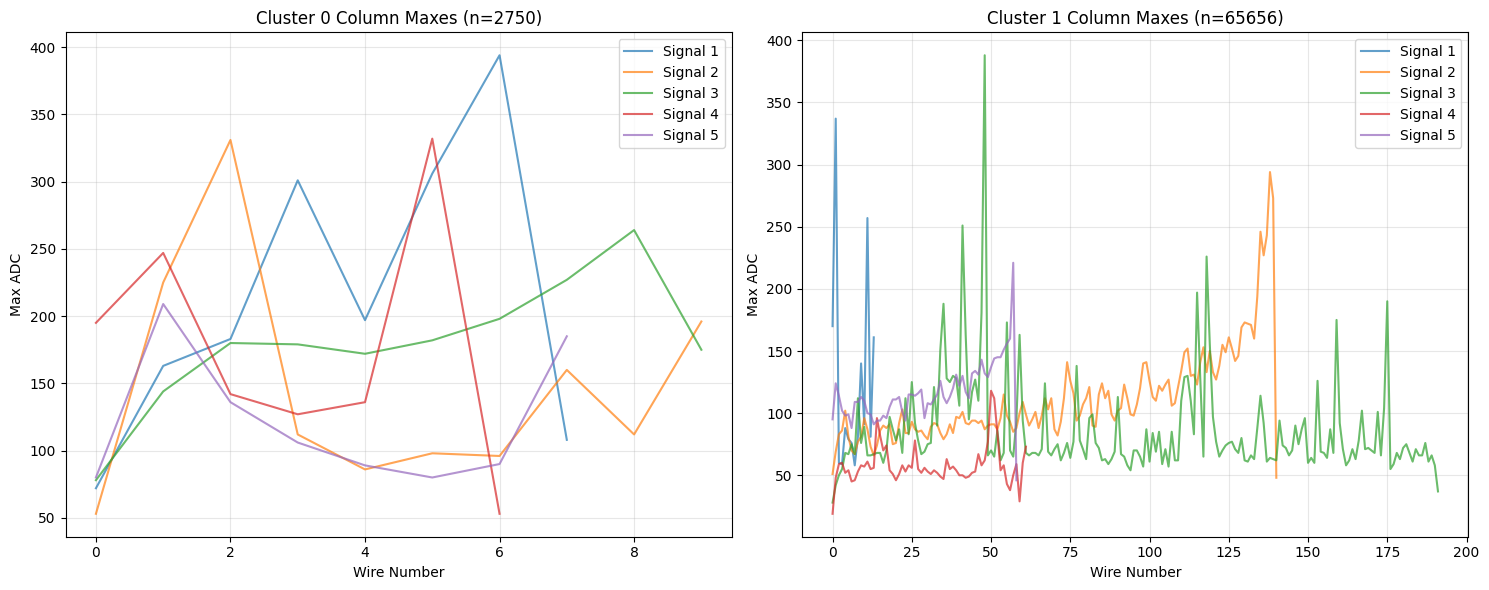

Cluster 0: 2750 signals
Cluster 1: 65656 signals

Cluster 0 avg volatility: 0.00
Cluster 1 avg volatility: 25.67


In [56]:
# Get cluster assignments for each signal
df['cluster'] = labels

# Sample a few signals from each cluster
n_samples = 5
cluster_0_samples = df[df['cluster'] == 0]['column_maxes'].sample(n_samples, random_state=5)
cluster_1_samples = df[df['cluster'] == 1]['column_maxes'].sample(n_samples, random_state=5)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Cluster 0 signals
for i, sig in enumerate(cluster_0_samples):
    ax1.plot(sig, alpha=0.7, label=f'Signal {i+1}')
ax1.set_title(f'Cluster 0 Column Maxes (n={sum(df["cluster"] == 0)})')
ax1.set_xlabel('Wire Number')
ax1.set_ylabel('Max ADC')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot Cluster 1 signals
for i, sig in enumerate(cluster_1_samples):
    ax2.plot(sig, alpha=0.7, label=f'Signal {i+1}')
ax2.set_title(f'Cluster 1 Column Maxes (n={sum(df["cluster"] == 1)})')
ax2.set_xlabel('Wire Number')
ax2.set_ylabel('Max ADC')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print cluster statistics
print(f"Cluster 0: {sum(df['cluster'] == 0)} signals")
print(f"Cluster 1: {sum(df['cluster'] == 1)} signals")
print(f"\nCluster 0 avg volatility: {df[df['cluster'] == 0]['volatility'].mean():.2f}")
print(f"Cluster 1 avg volatility: {df[df['cluster'] == 1]['volatility'].mean():.2f}")


=== Cluster 0 Event 1 (DataFrame index 12) ===
Found 70 connected regions
Found 47 connected regions


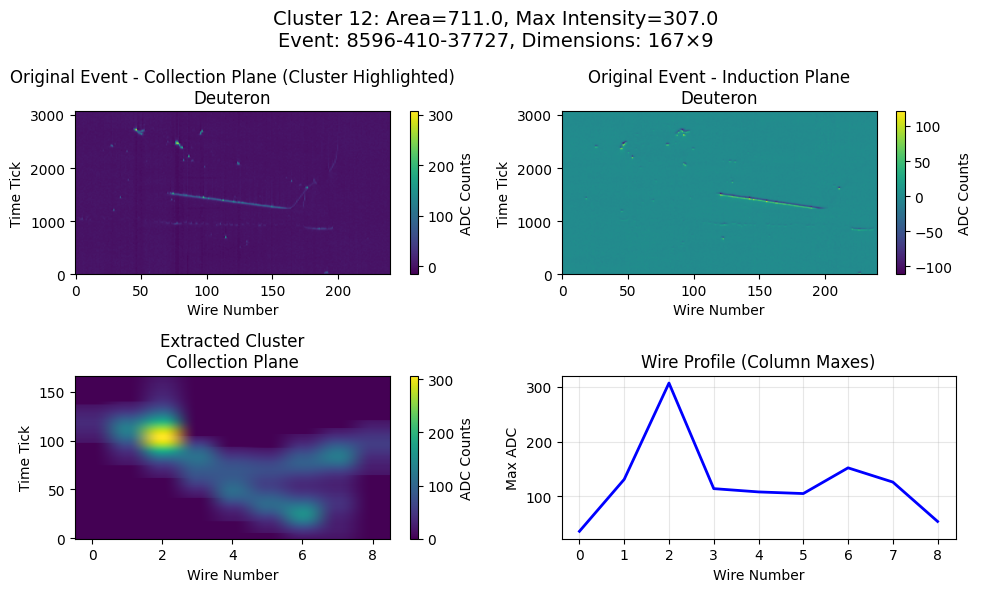

Cluster Statistics:
  Area: 711.0 pixels
  Total intensity: 48893.0
  Mean intensity: 68.8
  Aspect ratio: 18.56
  Compactness: 0.473
  Plane: collection

=== Cluster 0 Event 2 (DataFrame index 14) ===
Found 70 connected regions
Found 47 connected regions


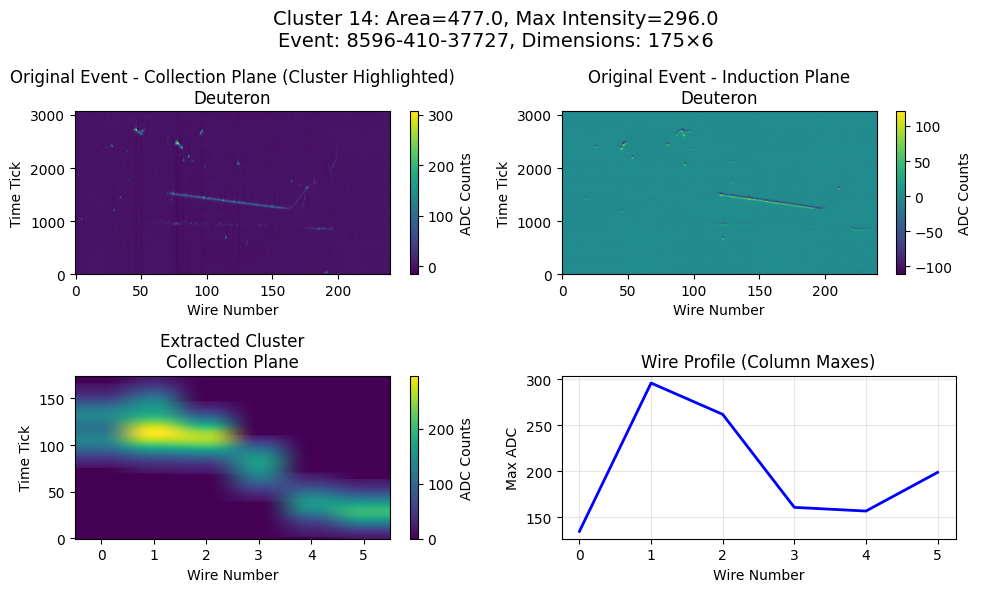

Cluster Statistics:
  Area: 477.0 pixels
  Total intensity: 51822.0
  Mean intensity: 108.6
  Aspect ratio: 29.17
  Compactness: 0.454
  Plane: collection

=== Cluster 0 Event 3 (DataFrame index 68) ===
Found 14 connected regions
Found 7 connected regions


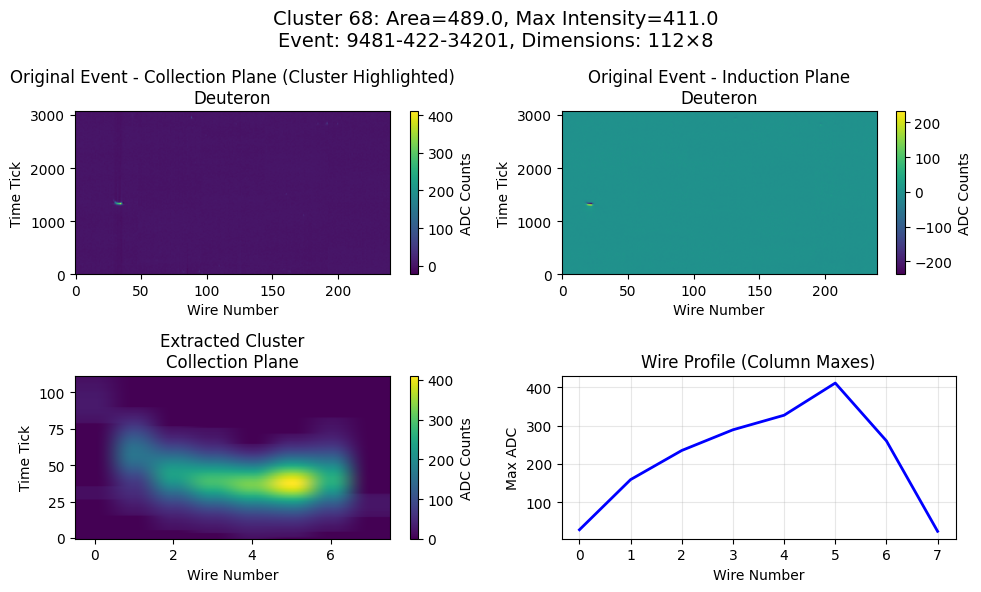

Cluster Statistics:
  Area: 489.0 pixels
  Total intensity: 56183.0
  Mean intensity: 114.9
  Aspect ratio: 14.00
  Compactness: 0.546
  Plane: collection

=== Cluster 0 Event 4 (DataFrame index 97) ===
Found 58 connected regions
Found 67 connected regions


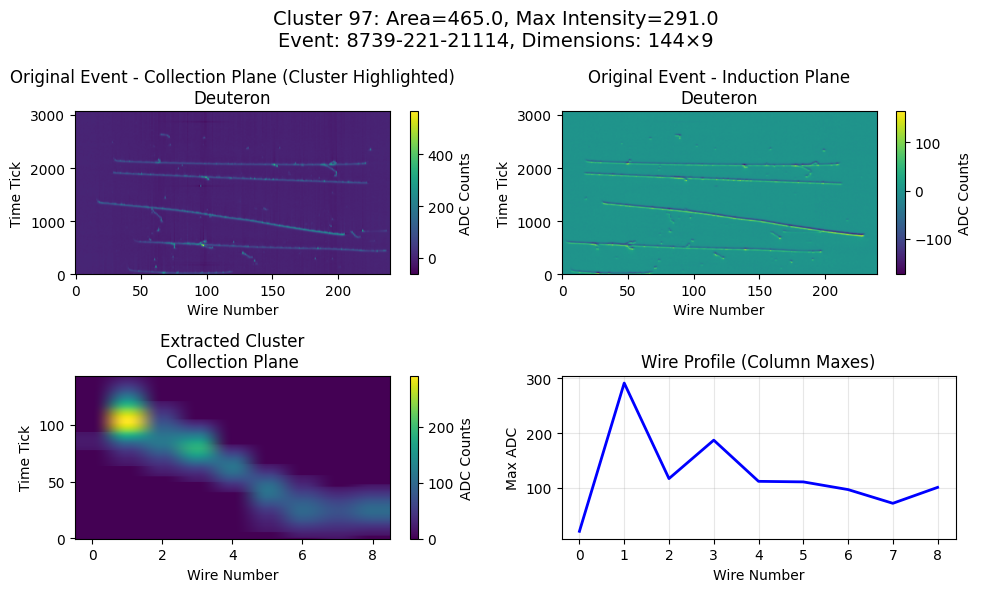

Cluster Statistics:
  Area: 465.0 pixels
  Total intensity: 35531.0
  Mean intensity: 76.4
  Aspect ratio: 16.00
  Compactness: 0.359
  Plane: collection

=== Cluster 0 Event 5 (DataFrame index 98) ===
Found 58 connected regions
Found 67 connected regions


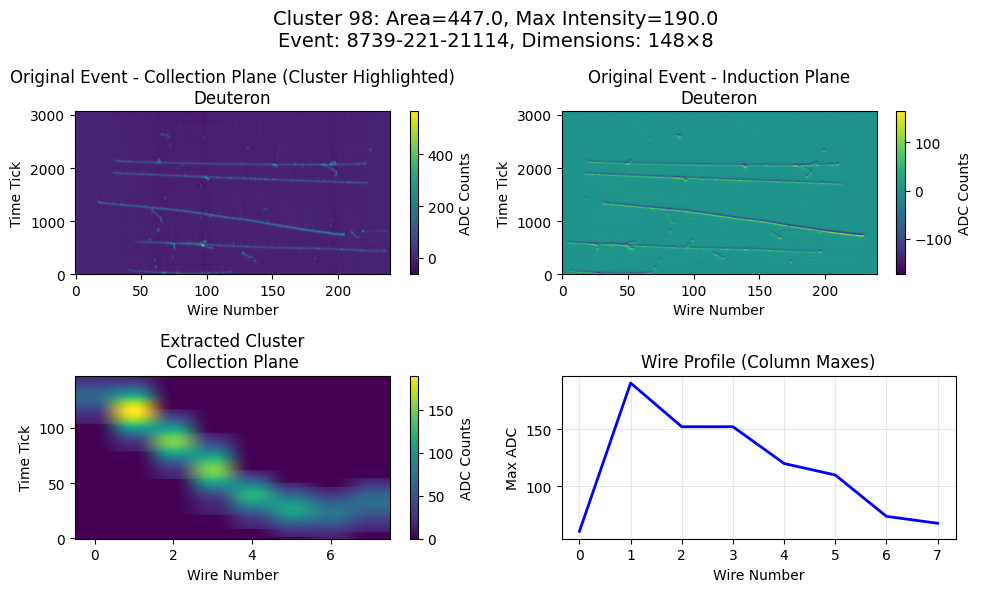

Cluster Statistics:
  Area: 447.0 pixels
  Total intensity: 30130.0
  Mean intensity: 67.4
  Aspect ratio: 18.50
  Compactness: 0.378
  Plane: collection


In [57]:
# Get indices of cluster 0 events
cluster_0_indices = df[df['cluster'] == 0].index.tolist()

# Plot first few events from cluster 0
n_events_to_plot = 5
for i, idx in enumerate(cluster_0_indices[:n_events_to_plot]):
    print(f"\n=== Cluster 0 Event {i+1} (DataFrame index {idx}) ===")
    plot_cluster_with_profile_and_event(df, idx)

In [59]:
proton_clusters_df

,event_idx,run,subrun,event,file_path,event_index,particle_type,plane,cluster_idx,area,...,bbox_min_col,bbox_max_row,bbox_max_col,width,height,aspect_ratio,compactness,image_intensity,matrix_transformed,column_maxes
0,0,8557,7,596,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,0,6161.0,...,356,125,998,642,93,6.903226,0.103189,"[[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[[16.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0,...","[226.0, 165.0, 151.0, 133.0, 190.0, 158.0, 162..."
1,0,8557,7,596,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,1,47.0,...,2580,69,2627,47,1,47.000000,1.000000,"[[16.0, 19.0, 22.0, 25.0, 29.0, 32.0, 37.0, 42...","[[17.0], [20.0], [23.0], [26.0], [29.0], [33.0...",[100.0]
2,0,8557,7,596,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,2,82.0,...,2893,204,2939,46,2,23.000000,0.891304,"[[16.0, 17.0, 19.0, 20.0, 22.0, 24.0, 26.0, 28...","[[16.0, 0.0], [18.0, 0.0], [20.0, 0.0], [22.0,...","[60.0, 48.0]"
3,0,8557,7,596,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,3,75.0,...,1146,211,1193,47,2,23.500000,0.797872,"[[16.0, 19.0, 21.0, 24.0, 27.0, 31.0, 35.0, 39...","[[0.0, 16.0], [0.0, 17.0], [16.0, 18.0], [18.0...","[81.0, 24.0]"
4,0,8557,7,596,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,0,3352.0,...,319,109,933,614,94,6.531915,0.058077,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[17.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[37.0, 73.0, 88.0, 96.0, 101.0, 114.0, 86.0, 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83691,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,4,31.0,...,2570,93,2601,31,1,31.000000,1.000000,"[[16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27...","[[16.0], [18.0], [19.0], [20.0], [21.0], [23.0...",[33.0]
83692,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,collection,5,27.0,...,277,115,304,27,1,27.000000,1.000000,"[[16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 29...","[[16.0], [18.0], [20.0], [21.0], [23.0], [24.0...",[33.0]
83693,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,0,1559.0,...,1101,83,1239,138,56,2.464286,0.201734,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[16.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0...","[23.0, 43.0, 54.0, 62.0, 51.0, 51.0, 56.0, 59...."
83694,7635,9788,311,27225,/Users/user/data/research/proton-deuteron/rawp...,0,proton,induction,1,24.0,...,2707,79,2731,24,1,24.000000,1.000000,"[[17.0, 19.0, 22.0, 25.0, 27.0, 30.0, 33.0, 35...","[[20.0], [25.0], [29.0], [34.0], [37.0], [40.0...",[45.0]


In [ ]:
pfeatures = np.array([extract_features(sig) for sig in proton_clusters_df['column_maxes']])
proton_clusters_df['slope'] = features[:, 0]
proton_clusters_df['volatility'] = features[:, 1] 
proton_clusters_df['length'] = features[:, 2]

In [114]:
L = 240                         # target length

def pad(sig, L=L):
    out = np.zeros(L, dtype=float)   # zero-pad; change to np.nan if you prefer
    n = len(sig)
    out[:n] = sig                    # copy as-is; no trimming needed now
    return out

df['vec'] = df['column_maxes'].map(pad)
X = np.vstack(df['vec'].to_list())   # shape (n_samples, 240)

In [115]:
X

array([[ 30.,  99., 109., ...,   0.,   0.,   0.],
       [ 20.,  78.,  66., ...,   0.,   0.,   0.],
       [ 60.,  91.,  85., ...,   0.,   0.,   0.],
       ...,
       [ 17.,  50.,  67., ...,   0.,   0.,   0.],
       [ 32.,  50.,  79., ...,   0.,   0.,   0.],
       [ 23.,  43.,  54., ...,   0.,   0.,   0.]], shape=(68406, 240))